# Intro to Deep Learning

## What is Deep Learning?

To get a clear understanding of what deep learning is we need to have a understanding of AI and machine learning first. 
![](images/compare_AI_ML_DL.png)

**Artificial Intelligence** is field of computer science that deals with operation performed by any system apart from human beings or put it more precise sentence *the effort to automate intellectual tasks normally performed by humans*. 

AI is a general field that encompasses machine learning and deep learning. 

**Machine Learning** on the other hand is ability of the machine to learn certain task. The aim here is to learn a particular set of rules. When the machine learns the set of rules, it then has the ability to perform a task.

A machine learning system has to learn an **example**--a collection of **features** also known as the independent variables and a **target** also known as dependent variable-- that we want a machine learning to process. 

![](images/machinelearningparadigm.png)


**Deep Learning** is a step further to machine learning. Since the so called examples can sometimes be very complex to understand and also difficult to extract vital information, we need some kind system that can break the pattern in a more step by step procedure and store the vital information for our understanding. 

Hence, a learning that is based upon finding hidden patterns in the data by making use of multilayer neural network or multilayer perceptron. 


## Content

1. Perceptron
- Temperature conversion
- Activation Function
- Dense Layer
- Vanila Neural Network

## 1. Perceptron : Forward Propagation

### What is a perceptron?
>A perceptron is fundamental block of a neural network. It consist of a single neuron and a single layer. 

![](images/perceptron.png)


#### Math behind it
##### Linear Algebra
- Vector, Matrix and Tensors
    - Vectors are list of numbers arranged in an orderly fashion
    - $x$ = $\begin{bmatrix}
4 \\
2 \\
\end{bmatrix}
$
    - A matrix is a 2 dimension array of numbers or Matrix is a regtangular arrangement of numbers in tabular format of rows and columns. 
    - $A$ = $\begin{bmatrix}
1 & 2  \\
2 & 4 \\
\end{bmatrix}
$ 
    - Tensors are matrices that more than 2 dimension. 
 
 
  
- Matrix Multiplication
    - $Ax = b$
    - Columns of the first matrix should be equal to row of the second matrix
    - $\begin{bmatrix}
1 & 2  \\
2 & 4 \\
\end{bmatrix}
$ x $\begin{bmatrix}
4 \\
2 \\
\end{bmatrix}
$ = 4 $\begin{bmatrix}
1 \\
2 \\
\end{bmatrix}$ + 2 $\begin{bmatrix}
2 \\
4 \\
\end{bmatrix}$
    - $\begin{bmatrix}
1 & 2  \\
2 & 4 \\
\end{bmatrix}
$ x $\begin{bmatrix}
4 \\
2 \\
\end{bmatrix}
$ = $\begin{bmatrix}
8 \\
16 \\
\end{bmatrix}
$
- Weights and Biases
    - Weights makes connection with the neurons whereas bias reduces the variance or the distribution of the data.
    - Both are scalar vectors.
- Linear regression and Logistic regression 
- Loss or error

## Constructing a perceptron -- Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
w = np.random.rand(1)
b = np.zeros(1)

In [3]:
X = np.random.rand(40,1) #column matrix

In [4]:
"""
y = mX + b
y = wX + b
"""
y = X*2 + 0 + 0.1*np.random.randn(40,1)

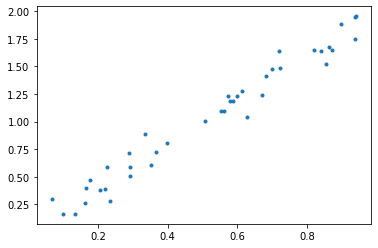

In [5]:
plt.plot(X,y, '.')
plt.show()

In [6]:
((w*X + b) - y ).mean() #mean absolute error => l1 norm

-0.6899498336053833

In [7]:
(((w*X + b) - y )**2).mean() #mean squared error =>l2

0.6095684152513359

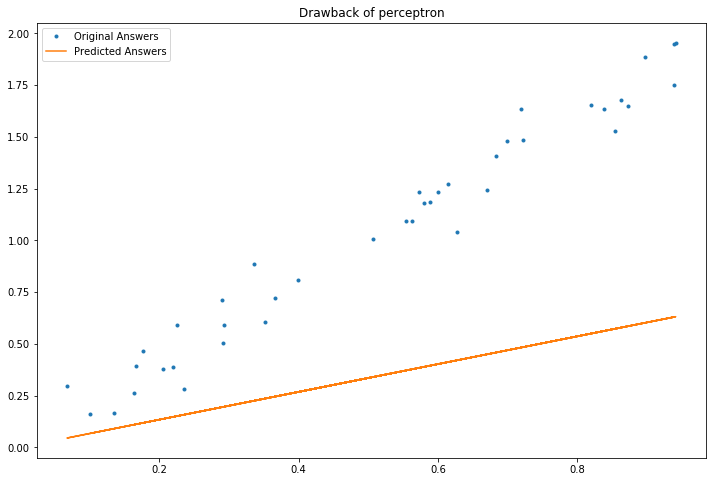

In [8]:
plt.figure(figsize=(12,8))
plt.plot(X,y, '.', label='Original Answers')
plt.plot(X,(w*X + b), label = 'Predicted Answers')
plt.title('Drawback of perceptron')
plt.legend()
plt.show()

## Drawback of perceptron

It does not correct itself. 

In [9]:
import pandas as pd

In [10]:
data = pd.DataFrame({'Feature1':X[:,0], 'Target':y[:,0]})

In [11]:
data.head()

,Feature1,Target
0,0.562318,1.091487
1,0.067715,0.294675
2,0.600361,1.232699
3,0.719433,1.636140
4,0.941476,1.954788


In [12]:
A = np.array([[2,1],
             [1,2]])

b = np.array([1,2])


m = np.linalg.solve(A,b)

print(m)

[0. 1.]


# 2. Temperature Conversion 

In [13]:
import numpy as np

In [14]:
import warnings
import keras
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [15]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
    print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


In [16]:
model = keras.Sequential([
    keras.layers.Dense(units=1, input_shape=[1])
])

In [17]:
model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.Adam(0.1))

history = model.fit(celsius_q, fahrenheit_a, epochs=1000, verbose=False)
print("Finished training the model")

Finished training the model


In [18]:
model.predict(np.array([0]))

array([[31.926275]], dtype=float32)

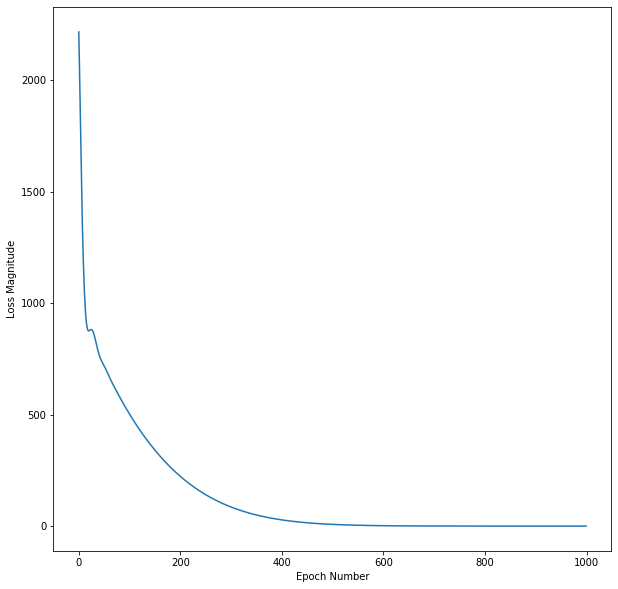

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

## Explaination -- How machine learning works?

### Backpropagation 

Back propagation is nothing but differentiation. 


In [20]:
X = np.random.rand(100,1)

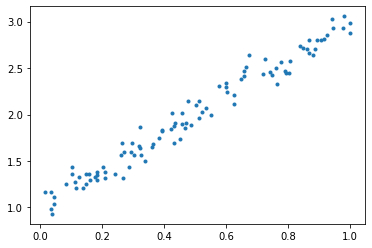

In [21]:
'''y = b + w.X + noise'''
y = 1 + 2 * X + .1 * np.random.randn(100, 1)
plt.plot(X,y, '.')

In [22]:
w = np.random.rand(1)
b = np.random.rand(1)

w,b

(array([0.93262093]), array([0.74111238]))

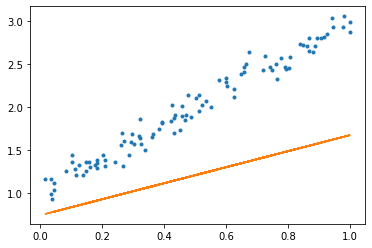

In [23]:
#forward propagation

y_new = w*X + b
plt.plot(X,y, '.')
plt.plot(X,y_new)

In [27]:
# back propagation

lr = 1e-3

def update(w,b,epochs):
    for i in range(epochs):
        yhat = b + w * X
        

        error = (y - yhat)

        b_grad = -2 * error.mean()
        w_grad = -2 * (X * error).mean()

        w = w - lr * w_grad
        b = b - lr * b_grad

    return (w,b)

In [28]:
w, b = update(w,b, 10000)

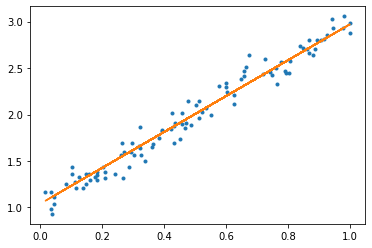

In [29]:
y_new = w*X + b

plt.plot(X,y, '.')
plt.plot(X,y_new)

## 3 Gradient Descent

Gradient descent (or steepest descent) is a first-order iterative optimization algorithm for finding the minimum of a function. To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient (or approximate gradient) of the function at the current point. If instead one takes steps proportional to the positive of the gradient, one approaches a local maximum of that function; the procedure is then known as gradient ascent.

The approach is based on the observation that if a multivariable function is defined and differentiable in a neighborhood of a point, then the function decreases fastest in the direction of the negative gradient. It follows that if: 

$\mathbf{x_{n+1} = w_n} - \gamma \nabla \mathbf{F(w_n)}$

For $\gamma$ small enough, then $F(x_n) \geq F(x_{n+1})$

The value of $\gamma$ is called the stepsize and is allowed to change at every iteration. Some more advanced implementations find the optimal value of $gamma$ at each step by using line search methods...

**Comments**
- The gradient is everywhere perpendicular to the contour lines.
- After each line minimization the new gradient is always orthogonal to the previous step direction (true of any line minimization.)
- Consequently, the iterates tend to zig-zag down the valley in a very
inefficient manner

## Calculus

### Function 

A function is defined as the relation between the input and the output, which can be denoted as:

$f(x) = y$

which basically means that the change of $y$ will entirely depends on the subtle changes in the $x$. Hence, their ought to be some kind of variable that scales the value of $x$ such that $y$ changes. 

### What is a derivative?

The derivative of a function of a real number measures the change of output value w.r.t input value. 


Consider an example where,

$y = x^2$

$y(x) = x^2$

$y'(x) = 2x $ 


$\frac{dy}{dx}= \lim_{x \rightarrow 0} \frac{y(x+dx)-y(x)}{dx}$

$\frac{dy}{dx}= \lim_{x \rightarrow 0} \frac{(x+dx)^2-x^2}{dx}$

$\frac{dy}{dx} = \lim_{x \rightarrow 0} \frac{x^2+dx^2+2xdx-x^2}{dx}$

$\frac{dy}{dx} = \lim_{x \rightarrow 0} \frac{dx (dx+2x)}{dx}$

$\frac{dy}{dx} = \lim_{x \rightarrow 0} dx+2x$ 

$\frac{dy}{dx} = 2x$

Since $dx$ will be an $\infty$ small number we can neglect it


Derivatives are also known as the slope of the line at given point. 

**Formula of finding a slope of a curve**:

$f(x) = x^n$

$f'(x) = nx^{n-1}$

Finding the **roots** of:

$f(x) = x^3 - 2x^2 - 11x + 12$ =>Non-Linear system with one unknown 

$f'(x) = 3x^2 - 4x - 11$ => First order differentiation

$f''(x) = 6x - 4$ => Second order differentiation

$f'''(x) = 6$ => Third order differentiation

In [52]:
"""y = ax2 + bx + c => formula of the parabola"""

X = np.linspace(-100, 100, 1000, dtype='float64')
y = 3*X**2 + 1*X + 1

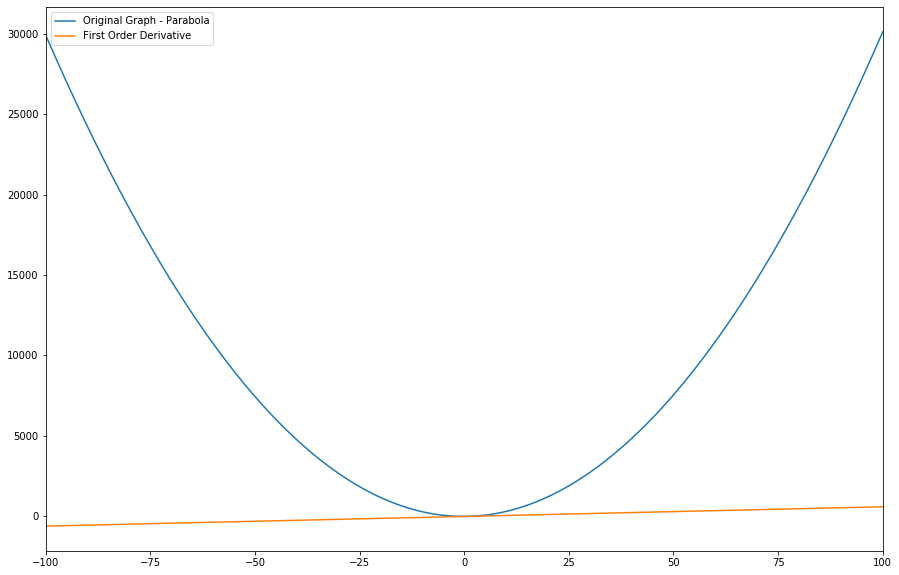

In [53]:
plt.figure(figsize=(15,10))
plt.plot(X,y,'-',label='Original Graph - Parabola')
plt.plot(X, 6*X+1, '-', label='First Order Derivative')
plt.xlim(-100, 100)
plt.legend()
plt.show()

In [33]:
X = np.random.rand(100, 1)
y = 3*X + 1 + 1 * np.random.randn(100,1)

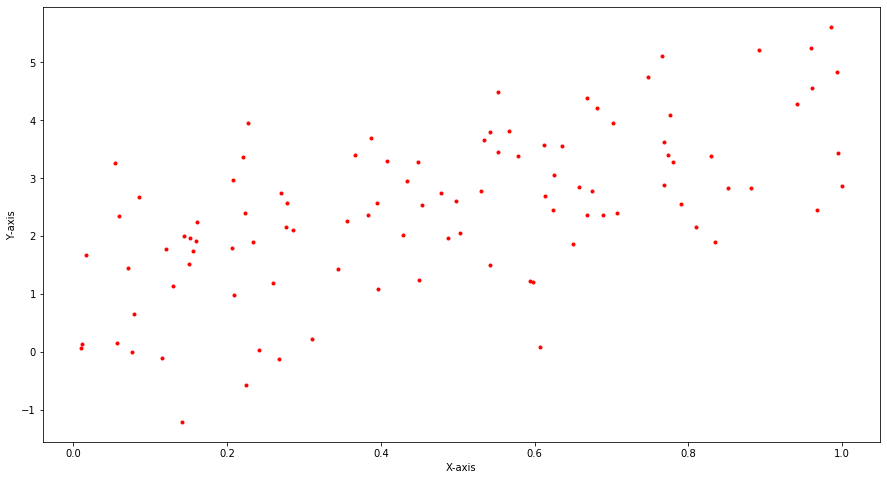

In [34]:
plt.figure(figsize=(15,8))
plt.plot(X,y, 'r.')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [35]:
#Randomly initialise the parameters

w = np.array([10])
b = np.zeros(1)

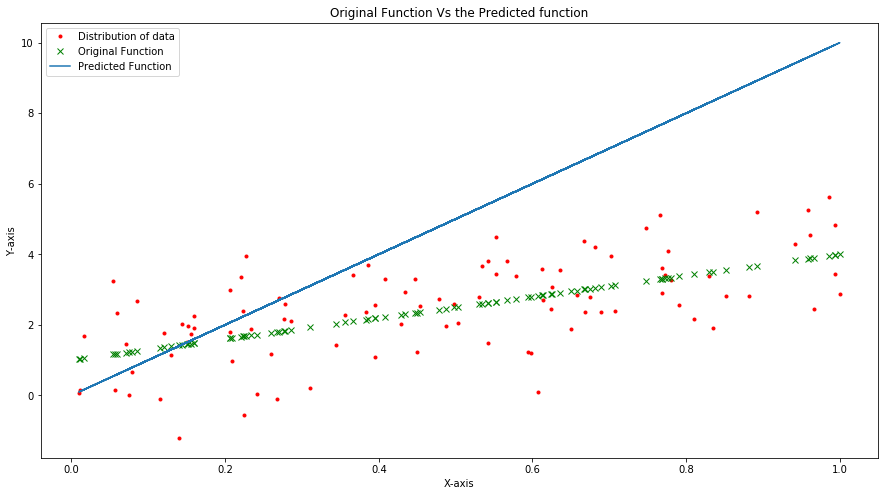

In [36]:
plt.figure(figsize=(15,8))
plt.plot(X,y, 'r.', label='Distribution of data')
plt.plot(X, X*3 + 1, 'gx',label='Original Function')
plt.plot(X,X*w+b, label = 'Predicted Function')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Original Function Vs the Predicted function')

plt.legend()
plt.show()

### Gradient Descent Formula for Linear Regression

$y({\theta}) = X{\theta} $

${\hat y} = wX + b $

$Loss = {\hat y} - y$

$L({\theta}) = \frac{1}{m}{\sum}Loss^2$

$L'({\theta}) = L({\theta})-({\alpha}(-2 \frac{1}{m}{\sum}({\hat y} - y)))$







In [37]:
def gradient_descent(x,y):
    
    epochs = 2000
    learningRate = 5e-2
    w = np.array([10])
    b = np.zeros(1)
    
    wList = []
    bList = []
    
    for i in range(epochs) :
        yhat = w*x + b
        
        error =  y - yhat
        
        wd = -2 * (x*error).mean()
        bd = -2 * error.mean()
        
        
        w = w - learningRate*wd
        b = b - learningRate*bd
        
        wList.extend(w)
        bList.extend(b)
        
    print('Output', wd, bd)
        
        
    return wList, bList, w, b

In [38]:
wList, bList, w, b = gradient_descent(X,y)

Output 1.9558772269756553e-06 -9.944040372111828e-07


In [39]:
print('After gradient descent the revised parameters are: ', w, b)

After gradient descent the revised parameters are:  [3.04730394] [1.02944062]


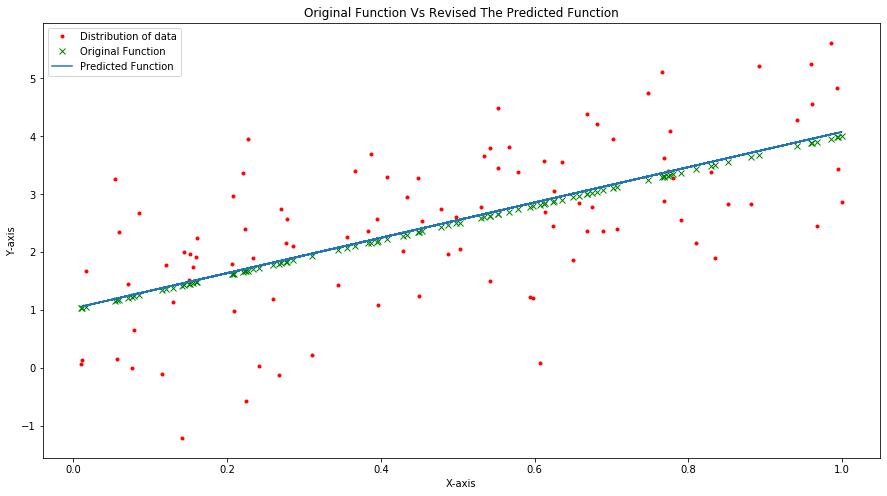

In [40]:
plt.figure(figsize=(15,8))
plt.plot(X,y, 'r.', label='Distribution of data')
plt.plot(X, X*3 + 1, 'gx',label='Original Function')
plt.plot(X,X*w+b, label = 'Predicted Function')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.title('Original Function Vs Revised The Predicted Function')
plt.legend()
plt.show()

## Into the details of Gradient Descent

### Local Minina

In [41]:
m = 20
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta1_true * x

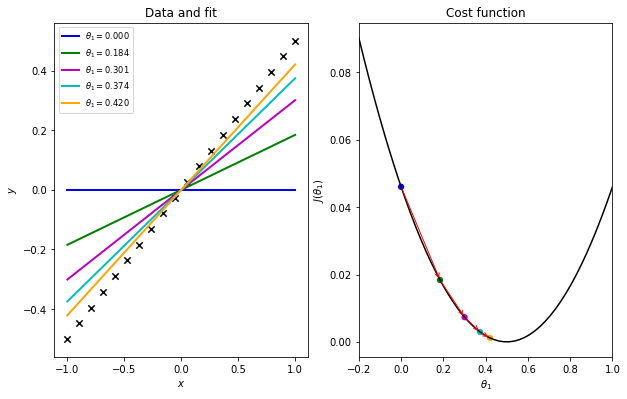

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6.15))
ax[0].scatter(x, y, marker='x', s=40, color='k')

def cost_func(theta1):
    """The cost function, J(theta1) describing the goodness of fit."""
    theta1 = np.atleast_2d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta1))**2, axis=1)/2

def hypothesis(x, theta1):
    """Our "hypothesis function", a straight line through the origin."""
    return theta1*x

theta1_grid = np.linspace(-0.2,1,50)
J_grid = cost_func(theta1_grid[:,np.newaxis])

# The cost function as a function of its single parameter, theta1.
ax[1].plot(theta1_grid, J_grid, 'k')

# Take N steps with learning rate alpha down the steepest gradient,
# starting at theta1 = 0.
N = 5
alpha = 1
theta1 = [0]
J = [cost_func(theta1[0])[0]]
for j in range(N-1):
    last_theta1 = theta1[-1]
    this_theta1 = last_theta1 - alpha / m * np.sum(
                                    (hypothesis(x, last_theta1) - y) * x)
    theta1.append(this_theta1)
    J.append(cost_func(this_theta1))

colors = ['b', 'g', 'm', 'c', 'orange']
ax[0].plot(x, hypothesis(x, theta1[0]), color=colors[0], lw=2,
           label=r'$\theta_1 = {:.3f}$'.format(theta1[0]))
for j in range(1,N):
    ax[1].annotate('', xy=(theta1[j], J[j]), xytext=(theta1[j-1], J[j-1]),
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
    ax[0].plot(x, hypothesis(x, theta1[j]), color=colors[j], lw=2,
               label=r'$\theta_1 = {:.3f}$'.format(theta1[j]))

# Labels, titles and a legend.
ax[1].scatter(theta1, J, c=colors, s=40, lw=0)
ax[1].set_xlim(-0.2,1)
ax[1].set_xlabel(r'$\theta_1$')
ax[1].set_ylabel(r'$J(\theta_1)$')
ax[1].set_title('Cost function')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Data and fit')
ax[0].legend(loc='upper left', fontsize='small')

# plt.tight_layout()
plt.show()

### Chain Rule

One more important point to remember is that there can be a system more than one component. 

For example:

$x^2 + 3y = z$

How to solve the above equation?

We can use **chain rule** to solve the above equation.

The chain rule is used to solve partial derivatives. Basically we solve the first component followed by the second. Note that while solving a particular component the other component becomes a constant. 

### Partial Derivatives 

Partial derivatives are similar like derivatives i.e. slope of the line except it is finds the slope of the line with multiple components. 

Lets try to solve the above linear system with three unknown. 

We know that $x$ and $y$ gives $z$, so we can write

$\frac{\partial z}{\partial x} = x^2 + 3y $

The above line says what is the change in $z$ if we only change $x$. Note, it has nothing to do with $y$.

$\frac{\partial' z}{\partial x} = 2x $

Similary, 

$\frac{\partial z}{\partial y} = x^2 + 3y $

$\frac{\partial' z}{\partial y} = 3 $

Therefore, we get

$\frac{\partial' z}{\partial (x,y)} =  2x + 3$

But what if we get a two component with has a multiplication operation also each component depends on another component. 

For example, 

$z = x^2y + xy^2$

$x = 2 + t^4$

$y = 1-t^3$


$\frac{\partial z}{\partial t} = \frac{\partial z}{\partial x} \frac{\partial x}{\partial t} + 
\frac{\partial z}{\partial y} \frac{\partial y}{\partial t}$

$\frac{\partial' z}{\partial t} = (2xy+y^2)(4t^3) + (x^2+2xy)(-3t^2)$



## 4. Activation Function

Function which breaks the linearity. 

- Sigmoid 
- Rectified Linear Unit -- ReLU

## Sigmoid

In [27]:
def sigmoid(z): return 1/(1+np.exp(-z))

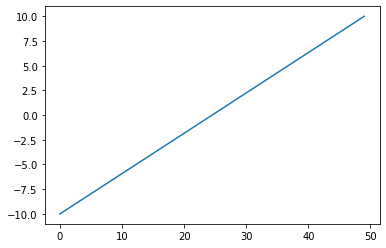

In [28]:
plt.plot(np.linspace(-10, 10, 50))

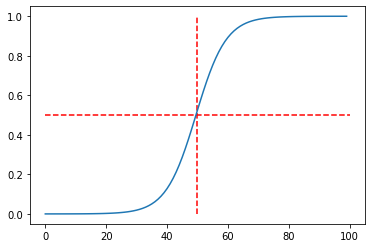

In [29]:
plt.plot(sigmoid(np.linspace(-10, 10, 100)))
plt.vlines(50,0,1, linestyles='--',colors='r')
plt.hlines(0.5,0,100, linestyles='--',colors='r')

## ReLU

In [77]:
def relu(x): return np.maximum(0,x)

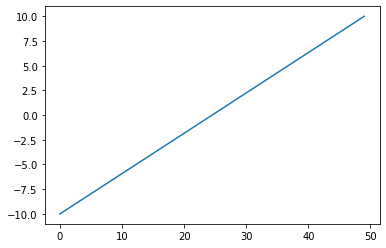

In [31]:
plt.plot(np.linspace(-10, 10, 50))

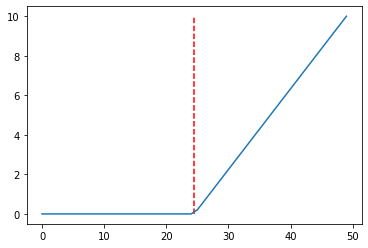

In [32]:
plt.plot(relu(np.linspace(-10, 10, 50)))
plt.vlines(24.5, 0, 10, linestyles='--',colors='r')

## 5. Dense Layer

Dense layer is multi-layer perceptron. All the inputs are densely connected to all perceptron in the network.

In [33]:
model = keras.Sequential([
    keras.layers.Dense(units=3, input_shape=[1]),
    keras.layers.Dense(units=1)
])


## 6. MNIST 


In [34]:
from keras.datasets import mnist

In [35]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [36]:
X_train = X_train/255.0
X_test = X_test/255.0

In [37]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(50))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dense(10))
model.add(keras.layers.Activation('softmax'))

In [38]:
model.compile(loss='sparse_categorical_crossentropy',
               optimizer="sgd", 
               metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                39250     
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.layers

In [41]:
model.weights[3]

<tf.Variable 'dense_5/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [42]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 3s 79us/step - loss: 0.7824 - accuracy: 0.8019 - val_loss: 0.4198 - val_accuracy: 0.8879
Epoch 2/100
42000/42000 [==============================] - 3s 74us/step - loss: 0.3836 - accuracy: 0.8945 - val_loss: 0.3427 - val_accuracy: 0.9032
Epoch 3/100
42000/42000 [==============================] - 3s 81us/step - loss: 0.3304 - accuracy: 0.9067 - val_loss: 0.3114 - val_accuracy: 0.9113
Epoch 4/100
42000/42000 [==============================] - 3s 73us/step - loss: 0.3009 - accuracy: 0.9151 - val_loss: 0.2912 - val_accuracy: 0.9169
Epoch 5/100
42000/42000 [==============================] - 5s 118us/step - loss: 0.2790 - accuracy: 0.9213 - val_loss: 0.2718 - val_accuracy: 0.9227
Epoch 6/100
42000/42000 [==============================] - 4s 87us/step - loss: 0.2607 - accuracy: 0.9266 - val_loss: 0.2587 - val_accuracy: 0.9259
Epoch 7/100
42000/42000 [==============================] - 4s

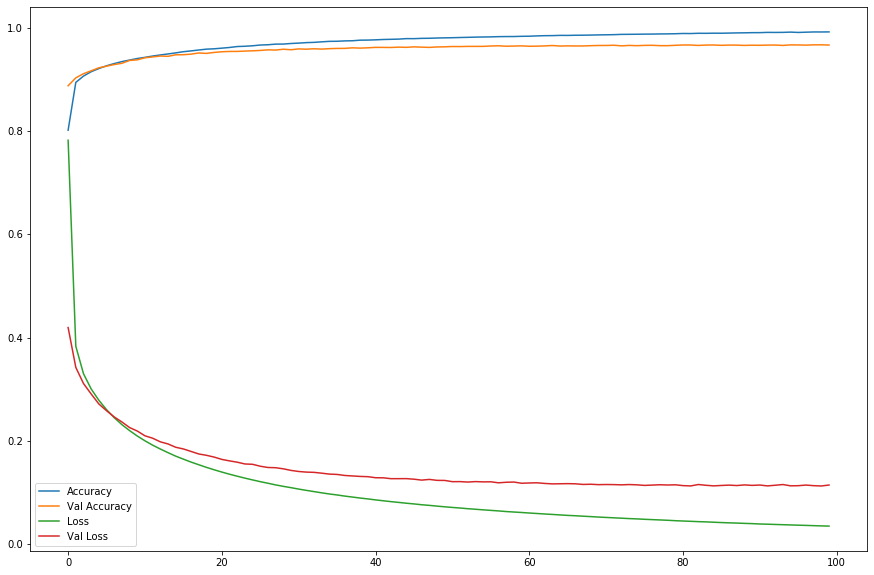

In [43]:
plt.figure(figsize=(15,10))
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')

plt.legend()
plt.show()

## Overfitting and Underfitting

**Overfitting** When the model is too complex to learn underlying data structure. An overfitting model can beobserved when training accuracy is more than validation accuracy. Eg. training accuracy: 0.98 whereas validation accuracy : 0.91

**Underfitting** When the model is too simple to learn underlying data structure. An underfitting model can be observered when the accuracy score isn't increasing. 


### Prevention

1. If the model is overfitting then try to make the model. 
    - Reduce the dense layers
2. Shuffle the dataset. 
    - Stratified shuffling instead random sampling
3. Regularise the model. 
    - Add L1 or L2 norms or even both
    - Use Dropout
    
4. Batch normalisation 
5. Normalisation

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score




np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

In [152]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

In [153]:
np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

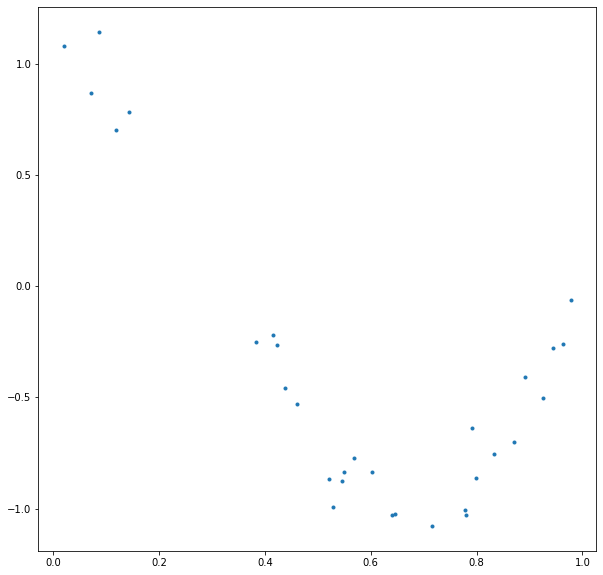

In [154]:
plt.figure(figsize=(10,10))
plt.plot(X, y, '.')

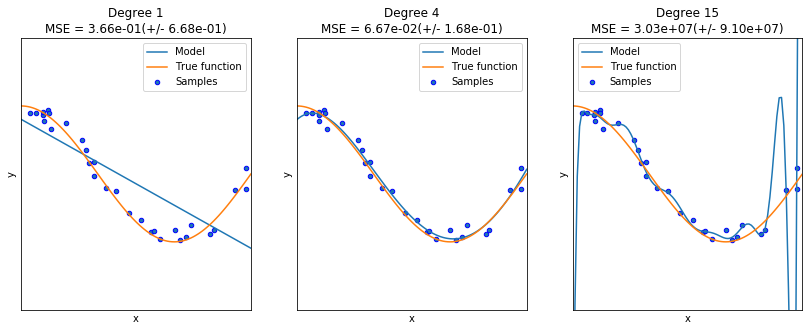

In [155]:
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

## Regularisation

In [44]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(50, kernel_regularizer=keras.regularizers.l1(0.01)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dense(10))
model.add(keras.layers.Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',
               optimizer="sgd", 
               metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=500, validation_split=0.3, batch_size=100 )

Train on 42000 samples, validate on 18000 samples
Epoch 1/500
42000/42000 [==============================] - 1s 26us/step - loss: 11.4280 - accuracy: 0.6653 - val_loss: 5.7388 - val_accuracy: 0.8222
Epoch 2/500
42000/42000 [==============================] - 1s 24us/step - loss: 3.1901 - accuracy: 0.8207 - val_loss: 1.8369 - val_accuracy: 0.8309
Epoch 3/500
42000/42000 [==============================] - 1s 24us/step - loss: 1.6919 - accuracy: 0.8168 - val_loss: 1.5611 - val_accuracy: 0.8313
Epoch 4/500
42000/42000 [==============================] - 1s 24us/step - loss: 1.5106 - accuracy: 0.8201 - val_loss: 1.4306 - val_accuracy: 0.8362
Epoch 5/500
42000/42000 [==============================] - 1s 24us/step - loss: 1.4041 - accuracy: 0.8234 - val_loss: 1.3413 - val_accuracy: 0.8388
Epoch 6/500
42000/42000 [==============================] - 1s 24us/step - loss: 1.3289 - accuracy: 0.8272 - val_loss: 1.2773 - val_accuracy: 0.8415
Epoch 7/500
42000/42000 [==============================] - 1s

Epoch 56/500
42000/42000 [==============================] - 1s 24us/step - loss: 0.8029 - accuracy: 0.8704 - val_loss: 0.7924 - val_accuracy: 0.8711
Epoch 57/500
42000/42000 [==============================] - 1s 24us/step - loss: 0.8010 - accuracy: 0.8702 - val_loss: 0.7868 - val_accuracy: 0.8723
Epoch 58/500
42000/42000 [==============================] - 1s 24us/step - loss: 0.7985 - accuracy: 0.8709 - val_loss: 0.7833 - val_accuracy: 0.8737
Epoch 59/500
42000/42000 [==============================] - 1s 23us/step - loss: 0.7961 - accuracy: 0.8711 - val_loss: 0.7862 - val_accuracy: 0.8718
Epoch 60/500
42000/42000 [==============================] - 1s 24us/step - loss: 0.7942 - accuracy: 0.8710 - val_loss: 0.7846 - val_accuracy: 0.8711
Epoch 61/500
42000/42000 [==============================] - 1s 24us/step - loss: 0.7924 - accuracy: 0.8713 - val_loss: 0.7782 - val_accuracy: 0.8731
Epoch 62/500
42000/42000 [==============================] - 1s 24us/step - loss: 0.7904 - accuracy: 0.8720

Epoch 111/500
42000/42000 [==============================] - 1s 24us/step - loss: 0.7273 - accuracy: 0.8783 - val_loss: 0.7173 - val_accuracy: 0.8792
Epoch 112/500
42000/42000 [==============================] - 1s 24us/step - loss: 0.7272 - accuracy: 0.8779 - val_loss: 0.7133 - val_accuracy: 0.8800
Epoch 113/500
42000/42000 [==============================] - 1s 24us/step - loss: 0.7258 - accuracy: 0.8790 - val_loss: 0.7163 - val_accuracy: 0.8808
Epoch 114/500
42000/42000 [==============================] - 1s 24us/step - loss: 0.7259 - accuracy: 0.8785 - val_loss: 0.7136 - val_accuracy: 0.8804
Epoch 115/500
42000/42000 [==============================] - 1s 24us/step - loss: 0.7245 - accuracy: 0.8786 - val_loss: 0.7142 - val_accuracy: 0.8792
Epoch 116/500
42000/42000 [==============================] - 1s 24us/step - loss: 0.7234 - accuracy: 0.8785 - val_loss: 0.7214 - val_accuracy: 0.8754
Epoch 117/500
42000/42000 [==============================] - 1s 24us/step - loss: 0.7228 - accuracy:

Epoch 220/500
42000/42000 [==============================] - 1s 28us/step - loss: 0.6727 - accuracy: 0.8843 - val_loss: 0.6684 - val_accuracy: 0.8833
Epoch 221/500
42000/42000 [==============================] - 1s 28us/step - loss: 0.6712 - accuracy: 0.8848 - val_loss: 0.6652 - val_accuracy: 0.8832
Epoch 222/500
42000/42000 [==============================] - 1s 29us/step - loss: 0.6726 - accuracy: 0.8839 - val_loss: 0.6629 - val_accuracy: 0.8869
Epoch 223/500
42000/42000 [==============================] - 1s 29us/step - loss: 0.6703 - accuracy: 0.8852 - val_loss: 0.6854 - val_accuracy: 0.8757
Epoch 224/500
42000/42000 [==============================] - 1s 28us/step - loss: 0.6702 - accuracy: 0.8858 - val_loss: 0.6629 - val_accuracy: 0.8884
Epoch 225/500
42000/42000 [==============================] - 1s 29us/step - loss: 0.6736 - accuracy: 0.8826 - val_loss: 0.6724 - val_accuracy: 0.8850
Epoch 226/500
42000/42000 [==============================] - 1s 29us/step - loss: 0.6712 - accuracy:

Epoch 329/500
42000/42000 [==============================] - 1s 26us/step - loss: 0.6540 - accuracy: 0.8842 - val_loss: 0.6408 - val_accuracy: 0.8868
Epoch 330/500
42000/42000 [==============================] - 1s 26us/step - loss: 0.6528 - accuracy: 0.8852 - val_loss: 0.6560 - val_accuracy: 0.8834
Epoch 331/500
42000/42000 [==============================] - 1s 34us/step - loss: 0.6538 - accuracy: 0.8860 - val_loss: 0.6532 - val_accuracy: 0.8839
Epoch 332/500
42000/42000 [==============================] - 1s 29us/step - loss: 0.6509 - accuracy: 0.8860 - val_loss: 0.6430 - val_accuracy: 0.8888
Epoch 333/500
42000/42000 [==============================] - 1s 26us/step - loss: 0.6532 - accuracy: 0.8863 - val_loss: 0.6582 - val_accuracy: 0.8874
Epoch 334/500
42000/42000 [==============================] - 1s 26us/step - loss: 0.6529 - accuracy: 0.8845 - val_loss: 0.6351 - val_accuracy: 0.8918
Epoch 335/500
42000/42000 [==============================] - 1s 25us/step - loss: 0.6523 - accuracy:

Epoch 438/500
42000/42000 [==============================] - 1s 26us/step - loss: 0.6414 - accuracy: 0.8855 - val_loss: 0.6506 - val_accuracy: 0.8798
Epoch 439/500
42000/42000 [==============================] - 1s 25us/step - loss: 0.6484 - accuracy: 0.8836 - val_loss: 0.6412 - val_accuracy: 0.8858
Epoch 440/500
42000/42000 [==============================] - 1s 25us/step - loss: 0.6468 - accuracy: 0.8847 - val_loss: 0.6214 - val_accuracy: 0.8933
Epoch 441/500
42000/42000 [==============================] - 1s 26us/step - loss: 0.6423 - accuracy: 0.8861 - val_loss: 0.6557 - val_accuracy: 0.8834
Epoch 442/500
42000/42000 [==============================] - 1s 24us/step - loss: 0.6414 - accuracy: 0.8884 - val_loss: 0.6160 - val_accuracy: 0.8936
Epoch 443/500
42000/42000 [==============================] - 1s 24us/step - loss: 0.6425 - accuracy: 0.8860 - val_loss: 0.6272 - val_accuracy: 0.8929
Epoch 444/500
42000/42000 [==============================] - 1s 24us/step - loss: 0.6442 - accuracy:

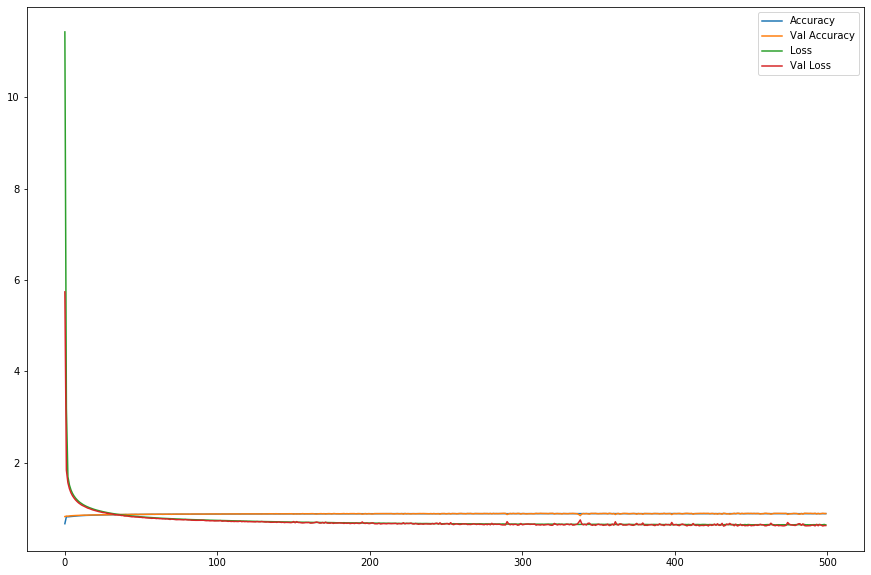

In [45]:
plt.figure(figsize=(15,10))
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')

plt.legend()
plt.show()

In [88]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 59us/step


[0.6080717221260071, 0.89410001039505]